<a href="https://colab.research.google.com/github/EnjyEldesouky/CODSOFT/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix



In [ ]:
iris=pd.read_csv('/content/Iris.csv')

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.tail()

In [24]:
iris.shape

(150, 6)

In [25]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# ID is integer, species is object and all the rest columns are float

In [26]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [27]:
iris.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


## There is no null values in our dataset

#DataCleaning

In [28]:
iris.drop(columns='Id',inplace=True)

##since that the column id will not affect the dataset so we will drop it

In [29]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
iris.shape

(150, 5)

## 5 columns instead of 6 columns since we drop the id column

In [30]:
iris.Species.value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


##The flowers are classified equally
##Iris-setosa	50
##Iris-versicolor	50
##Iris-virginica	50

#DATA VISUALIZATION(EDA)

<Axes: xlabel='Species', ylabel='count'>

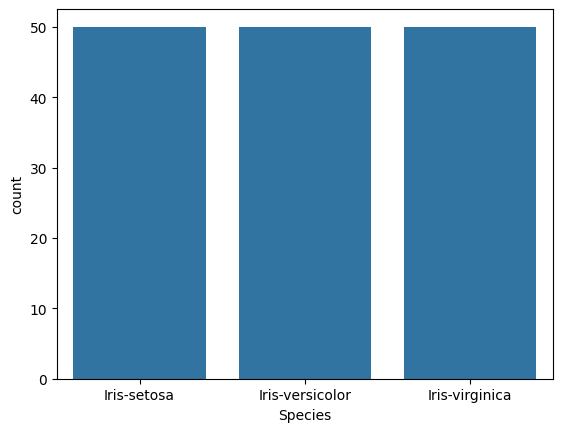

In [34]:
sns.countplot(x='Species',data=iris)

In [36]:
iris.sample()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
43,5.0,3.5,1.6,0.6,Iris-setosa


<Axes: xlabel='SepalLengthCm', ylabel='Count'>

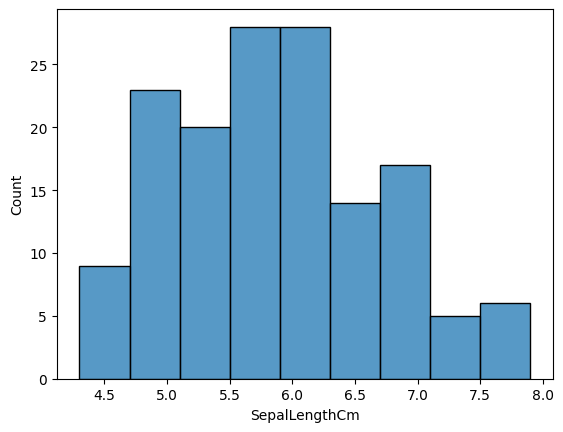

In [38]:
sns.histplot(x='SepalLengthCm',data=iris)

<Axes: xlabel='PetalLengthCm', ylabel='Count'>

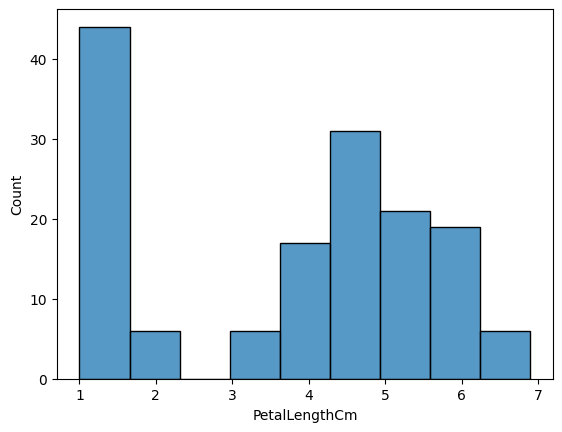

In [41]:
sns.histplot(x='PetalLengthCm',data=iris)

<Axes: xlabel='SepalWidthCm', ylabel='Count'>

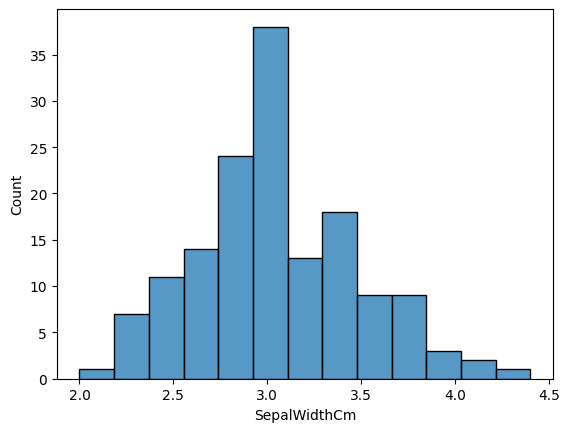

In [42]:
sns.histplot(x='SepalWidthCm',data=iris)

<Axes: xlabel='PetalWidthCm', ylabel='Count'>

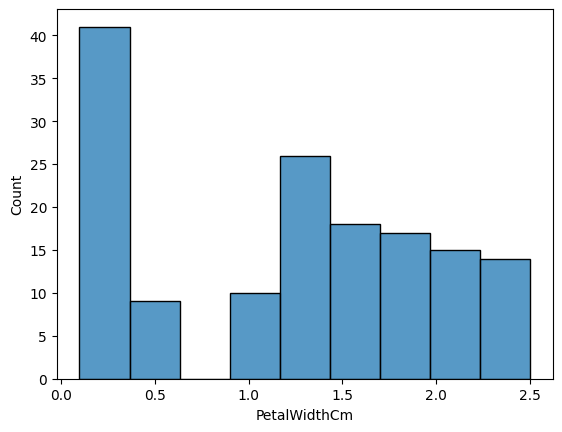

In [43]:
sns.histplot(x='PetalWidthCm',data=iris)

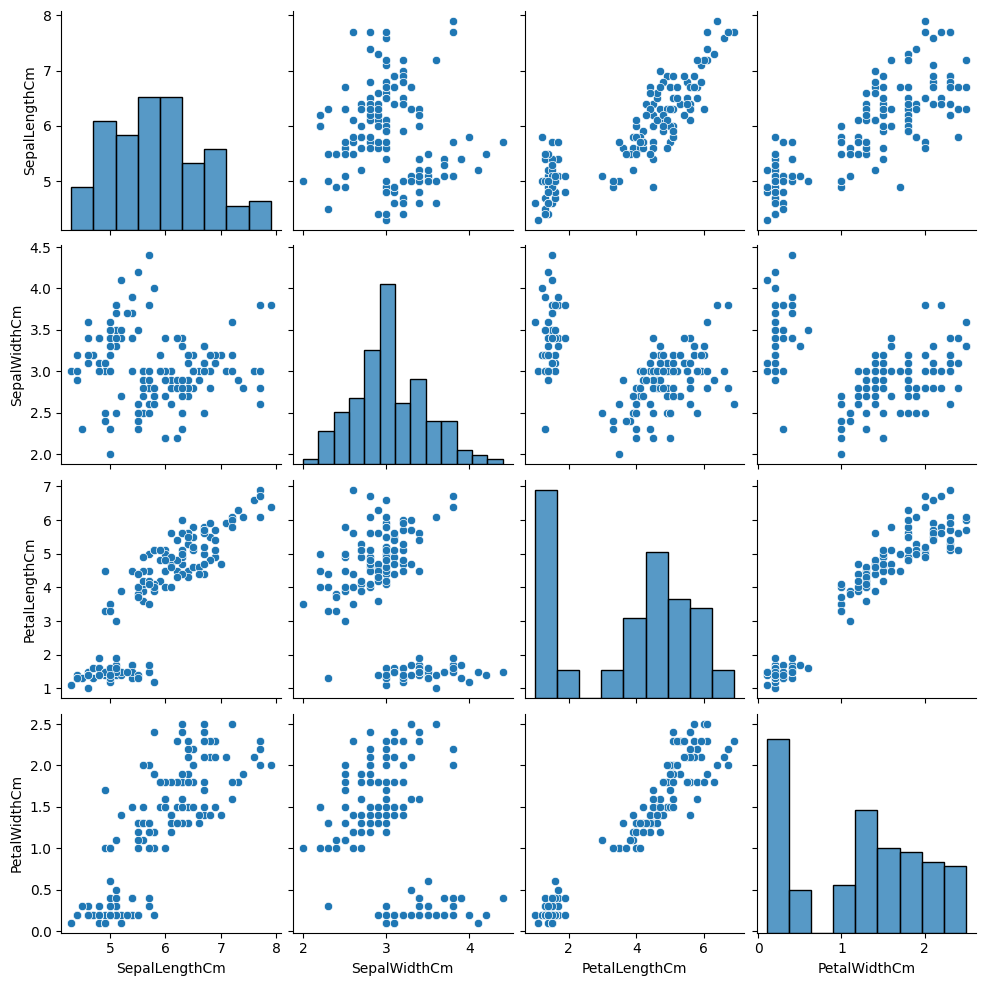

In [46]:
sns.pairplot(iris)

#Feature Engineering

In [50]:
from sklearn.preprocessing import LabelEncoder

In [52]:
iris['Species'] = LabelEncoder().fit_transform(iris['Species'])


In [53]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [54]:
iris.Species

,Species
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


#we transform the string in species into integer numbers
##0 iris-setosa
##1 iris-versicolor,
##2 iris-virginica.


In [55]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

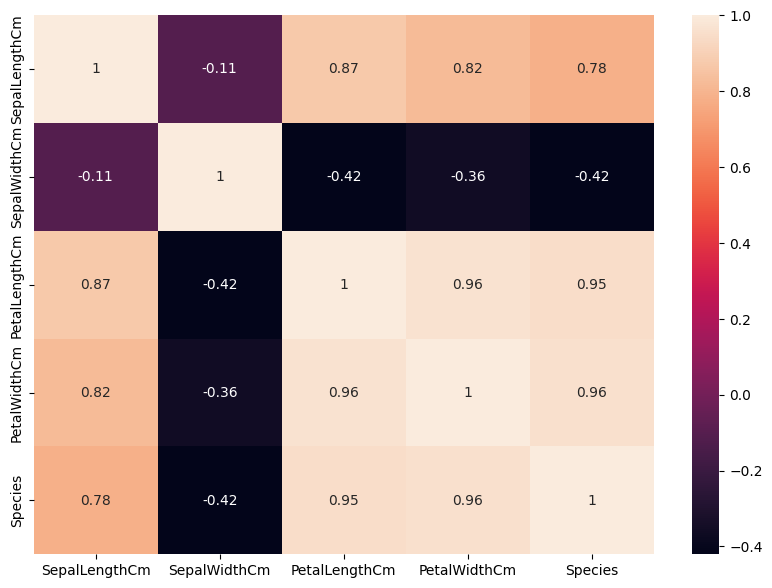

In [56]:
corr = iris.corr()
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, annot=True)

In [57]:
x=iris.drop('Species',axis=1)
y=iris.Species

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## split into 80% train 20% test

In [59]:
model1=DecisionTreeClassifier()
model2=GaussianNB()
model3=KNeighborsClassifier()
model4=LogisticRegression()
model5=RandomForestClassifier()
model6=SVC()

In [60]:
Allaccuracy=[]

In [63]:
def models(model):
  model.fit(x_train,y_train)
  predict=model.predict(x_test)
  accuracy=accuracy_score(predict,y_test)
  print('accuracy is',accuracy*100)
  Allaccuracy.append(accuracy)

In [64]:
models(model1) #Decision tree

accuracy is 100.0


In [66]:
models(model2) #naive

accuracy is 100.0


In [67]:
models(model3) #KNN

accuracy is 100.0


In [65]:
models(model4)#logistic

accuracy is 100.0


In [68]:
models(model5) #random forest

accuracy is 100.0


In [69]:
models(model6) #svm

accuracy is 100.0


Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



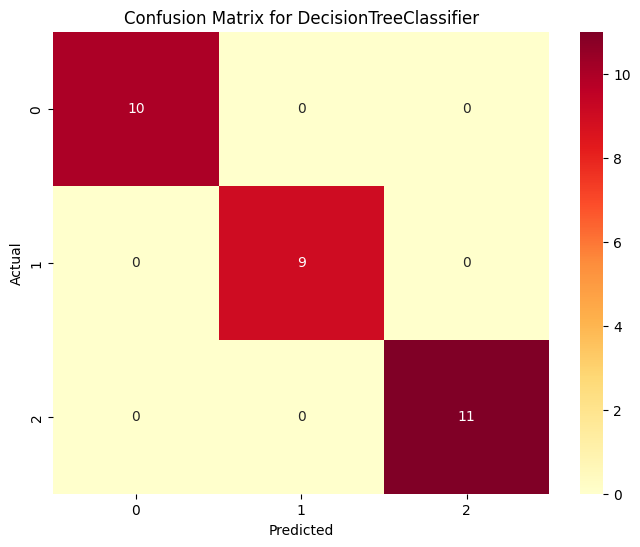

Classification Report for GaussianNB:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



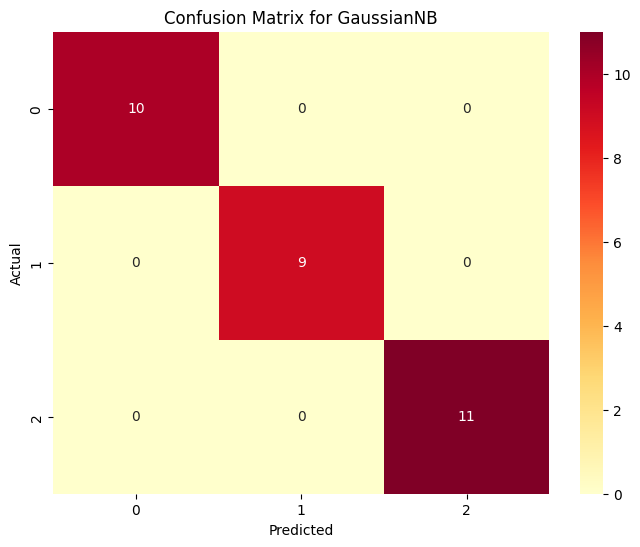

Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



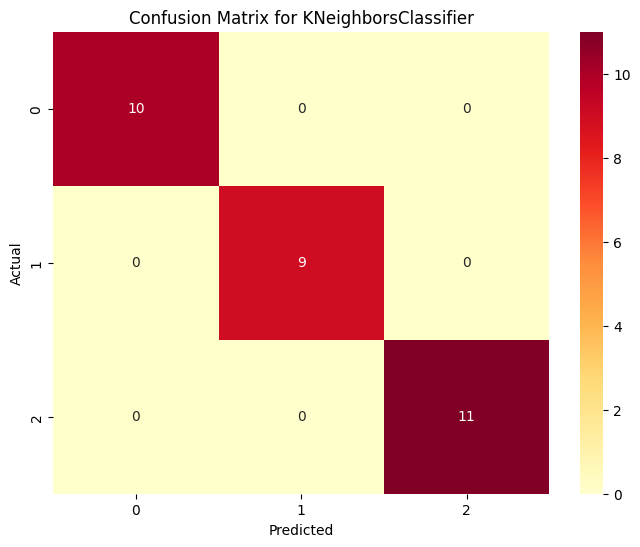

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



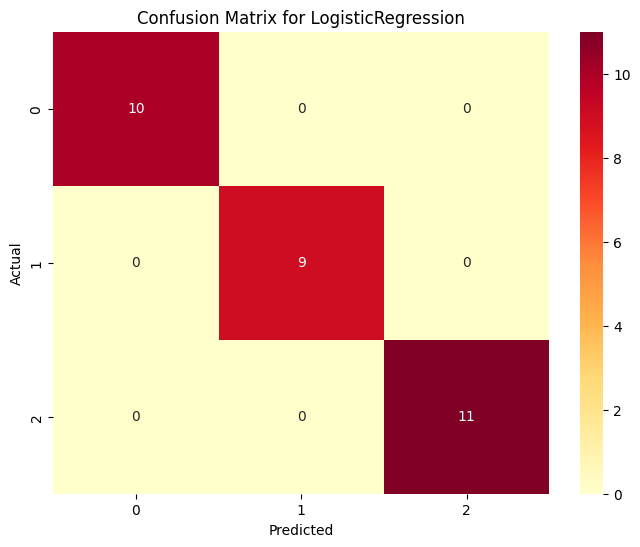

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



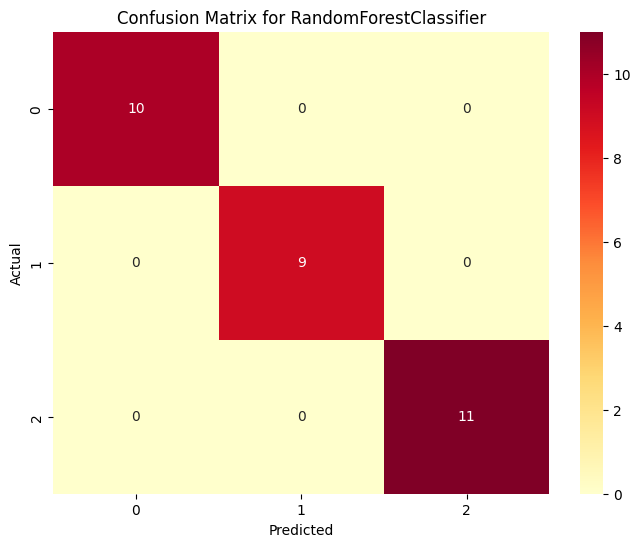

Classification Report for SVC:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



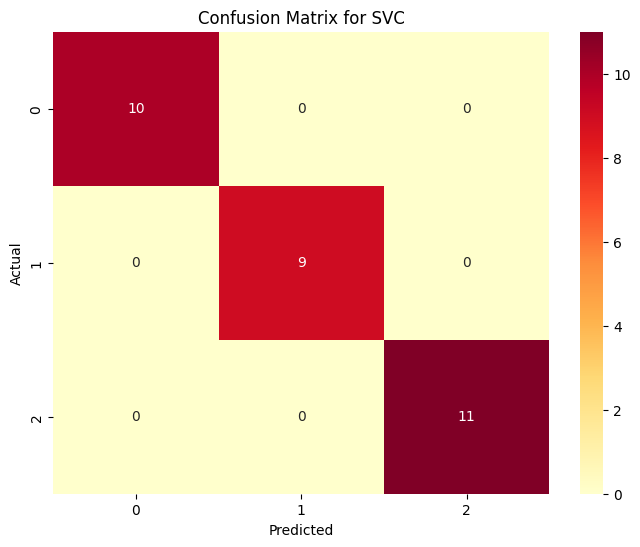

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def models(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Classification report
    print(f"Classification Report for {type(model).__name__}:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='YlOrRd')
    plt.title(f"Confusion Matrix for {type(model).__name__}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Usage
model1 = DecisionTreeClassifier()
model2 = GaussianNB()
model3 = KNeighborsClassifier()
model4 = LogisticRegression()
model5 = RandomForestClassifier()
model6 = SVC()

models(model1, x_train, y_train, x_test, y_test)
models(model2, x_train, y_train, x_test, y_test)
models(model3, x_train, y_train, x_test, y_test)
models(model4, x_train, y_train, x_test, y_test)
models(model5, x_train, y_train, x_test, y_test)
models(model6, x_train, y_train, x_test, y_test)

In [71]:
print(x)
print(y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64


In [72]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [73]:
predict1 = model1.predict([[5.1,3.5,1.4,0.2]]) #decision tree
print(predict1)
predict2 = model2.predict([[5.1,3.5,1.4,0.2]]) #naive
print(predict2)
predict3 = model3.predict([[5.1,3.5,1.4,0.2]]) #KNN
print(predict3)
predict4 = model4.predict([[5.1,3.5,1.4,0.2]]) #logistic regression
print(predict4)
predict5 = model5.predict([[5.1,3.5,1.4,0.2]]) #random forest
print(predict5)
predict6 = model6.predict([[5.1,3.5,1.4,0.2]]) #SVM
print(predict6)

[0]
[0]
[0]
[0]
[0]
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have val

# THE 6 MODELS ARE PERFECT FOR THIS DATASET THEY ALL PREDICT CORRECTLY!!!!!!!!!!